# 📊 Bank Term Deposit Subscription Prediction Dataset

## 📌 Title  
**Bank Term Deposit Subscription Prediction Dataset**

## 📝 Subtitle  
Predict whether a client will subscribe to a bank term deposit

---

## 📖 Description  
This dataset contains information about clients of a Portuguese banking institution. The goal is to **predict whether a client will subscribe to a bank term deposit** (variable `y`).  
The data was obtained from a direct marketing campaign, and each entry corresponds to a single client.

---

## 📂 Dataset Content  
The dataset contains **45,211 entries** with **17 attributes**. The attributes represent **client information** and **campaign details**, and they include both **categorical** and **numerical** data.

---

## 🔍 Features Description

- `age`: Age of the client (numeric)  
- `job`: Type of job (categorical: `"admin."`, `"blue-collar"`, `"entrepreneur"`, etc.)  
- `marital`: Marital status (categorical: `"married"`, `"single"`, `"divorced"`)  
- `education`: Level of education (categorical: `"primary"`, `"secondary"`, `"tertiary"`, `"unknown"`)  
- `default`: Has credit in default? (categorical: `"yes"`, `"no"`)  
- `balance`: Average yearly balance in euros (numeric)  
- `housing`: Has a housing loan? (categorical: `"yes"`, `"no"`)  
- `loan`: Has a personal loan? (categorical: `"yes"`, `"no"`)  
- `contact`: Type of communication contact (categorical: `"unknown"`, `"telephone"`, `"cellular"`)  
- `day`: Last contact day of the month (numeric, 1–31)  
- `month`: Last contact month of the year (categorical: `"jan"`, `"feb"`, `"mar"`, …, `"dec"`)  
- `duration`: Last contact duration in seconds (numeric)  
- `campaign`: Number of contacts performed during this campaign (numeric)  
- `pdays`: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)  
- `previous`: Number of contacts performed before this campaign (numeric)  
- `poutcome`: Outcome of the previous marketing campaign (categorical: `"unknown"`, `"other"`, `"failure"`, `"success"`)  
- `y`: **Target variable**, whether the client subscribed to a term deposit (binary: `"yes"`, `"no"`)

---

## 🧹 Data Preprocessing  
No preprocessing has been applied.  
Users are encouraged to:
- Handle missing values  
- Encode categorical variables  
- Perform feature engineering as necessary  

---

## 🏷️ Acknowledgments  
This dataset was made available by **UCI Machine Learning Repository**.  
The data is provided **"as is"** without any warranty.

---

## 📄 License  
Available for public use under the **Open Data Commons Public Domain Dedication and License (PDDL)**.

---

## 💡 Inspiration  
- Can you predict whether a client will subscribe to a term deposit?  
- What features most influence the decision to subscribe?  
- How do different machine learning models perform on this dataset?

---

## 📁 File  
- `bank-full.csv`: The primary dataset with all features and the target variable.  
- See the notebook attached with this dataset to understand how to move forward.

In [ ]:
## 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [5]:
df= pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [7]:
df['y'].unique()

array([0, 1], dtype=int64)

In [8]:
df_clean = df.drop(columns=['id'])

In [9]:
df_clean.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


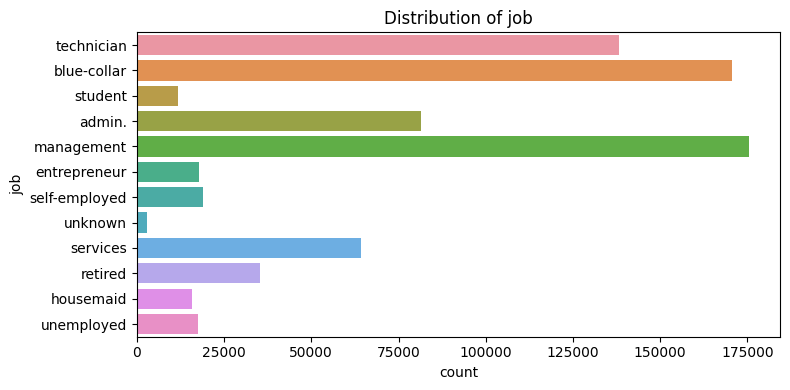

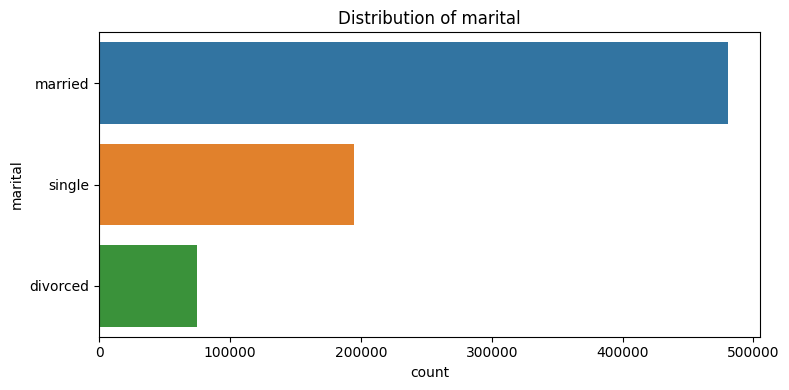

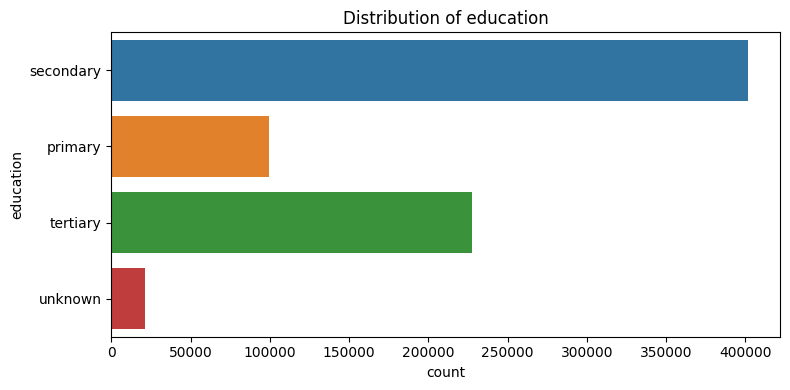

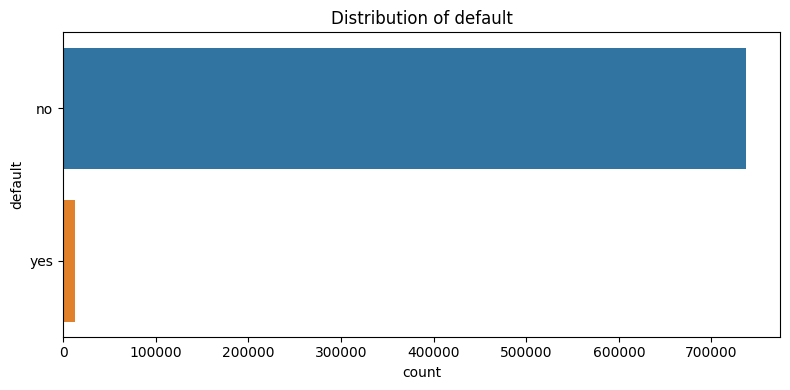

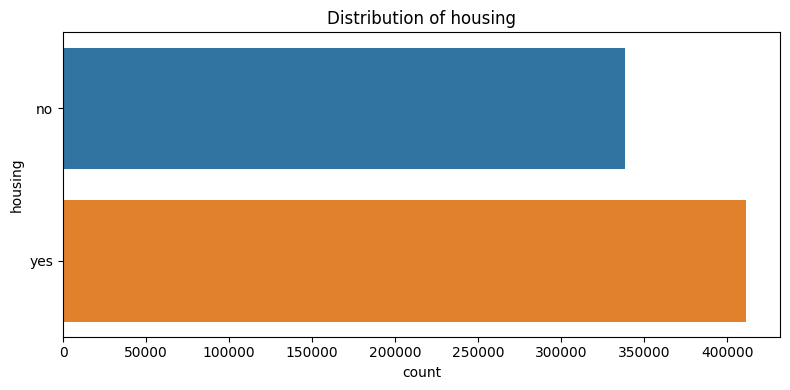

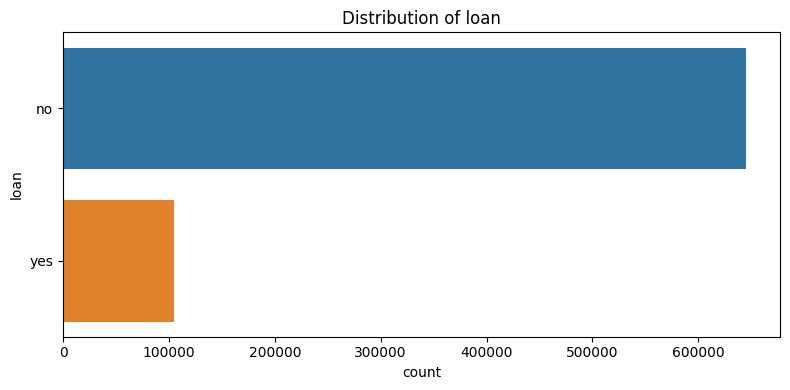

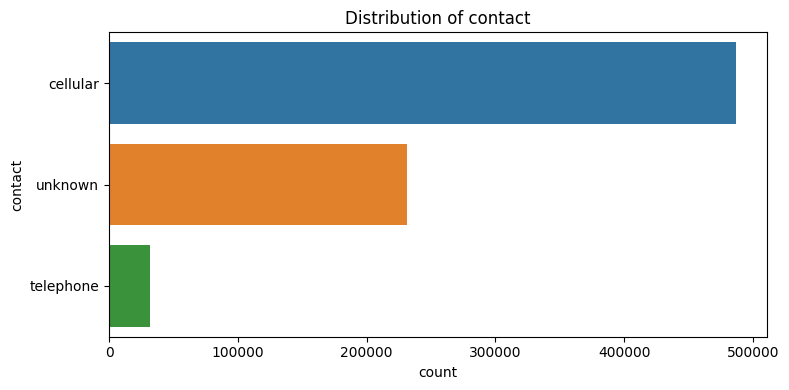

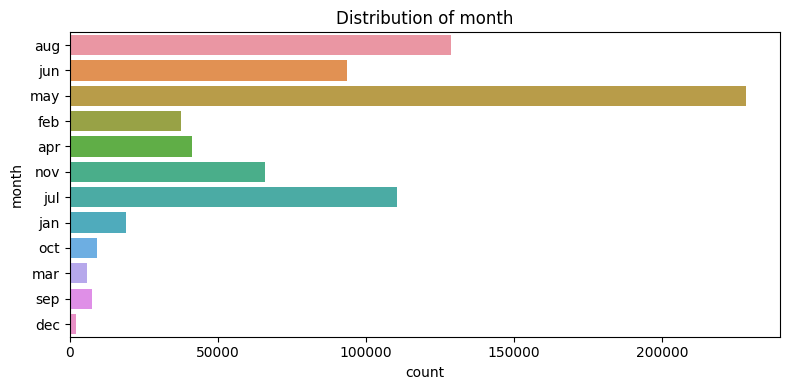

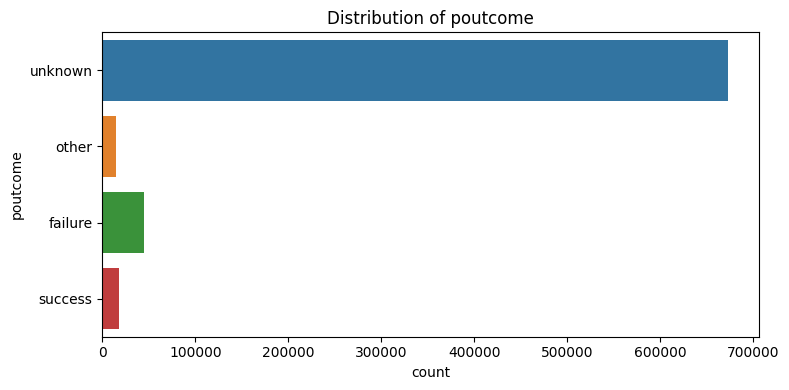

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

object_columns = df_clean.select_dtypes(include='object').columns

# Loop untuk setiap kolom object
for col in object_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df_clean)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Build Model


In [11]:
df_test = pd.read_csv('test.csv')

In [12]:
df_test = df_test.drop(columns=['id'])

In [13]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


In [14]:
X = df_clean.drop(columns='y')
y = df_clean['y']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [17]:
from sklearn.impute import SimpleImputer
# Scale the numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [24]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [40]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)

In [41]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time= 2.9min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time= 2.9min
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Sim...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [42]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score: 0.93


In [25]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ))
])

# Latih dengan seluruh data latih
final_pipeline.fit(X_train, y_train)

# Prediksi ke test
y_val_pred = final_pipeline.predict(X_val)

# Cek confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[130324   1471]
 [ 11254   6951]]


In [26]:
# Tambahan: Laporan klasifikasi
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95    131795
           1       0.83      0.38      0.52     18205

    accuracy                           0.92    150000
   macro avg       0.87      0.69      0.74    150000
weighted avg       0.91      0.92      0.90    150000



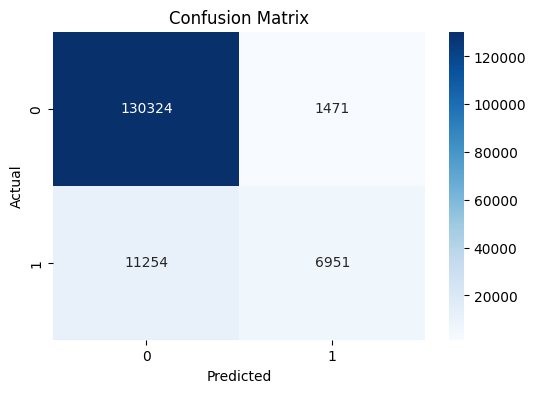

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

print("Semua modul berhasil diimpor!")

Semua modul berhasil diimpor!


In [32]:
# 1. Preprocessing dulu
X_train_processed = preprocessor.fit_transform(X_train)

# 2. SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# 3. Latih model (misalnya RandomForest)
model_final = RandomForestClassifier(random_state=42)
model_final.fit(X_resampled, y_resampled)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MrBento\\anaconda3\\envs\\cnn\\lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MrBento\\anaconda3\\envs\\cnn\\lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

RandomForestClassifier(random_state=42)

In [33]:
X_val_processed = preprocessor.transform(X_val)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data validasi
y_pred = model_final.predict(X_val_processed)

# Hitung akurasi
akurasi = accuracy_score(y_val, y_pred)
print("Akurasi:", akurasi)

# Laporan klasifikasi (precision, recall, f1)
print(classification_report(y_val, y_pred))

# Confusion matrix
print(confusion_matrix(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)

Akurasi: 0.9235866666666667
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    131795
           1       0.66      0.76      0.71     18205

    accuracy                           0.92    150000
   macro avg       0.81      0.85      0.83    150000
weighted avg       0.93      0.92      0.93    150000

[[124709   7086]
 [  4376  13829]]


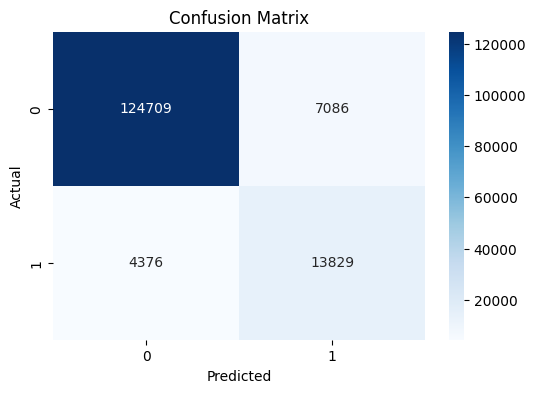

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
df_test_one = pd.read_csv('test.csv')

In [103]:
data_baru_processed = preprocessor.transform(df_test_one)

In [104]:
test_pred = model_final.predict_proba(data_baru_processed.astype('str'))[:, 1]

In [110]:
df_test_one

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,predict
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0.01
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0.18
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0.00
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0.00
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown,0.00
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure,0.36
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success,0.86
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown,0.00


In [105]:
df_test_one['predict']= test_pred

In [107]:
sub = pd.read_csv('sample_submission.csv')

,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5
...,...,...
249995,999995,0.5
249996,999996,0.5
249997,999997,0.5
249998,999998,0.5


In [108]:
sub['y']=test_pred

In [111]:
sub.to_csv('submission.csv')

In [113]:
sub[sub['y']>0.9]

,id,y
71,750071,0.92
95,750095,0.93
151,750151,0.99
155,750155,0.93
171,750171,1.00
...,...,...
249930,999930,0.91
249933,999933,0.98
249958,999958,0.95
249982,999982,0.98


In [116]:
sub.to_excel('submission.xlsx')